# Deep Learning & Artificial Intelligence
## Deep Learning for Computer Vision - Chapter 5
### Dr. Jie Tao, Fairfield University

## What is Convolutional Neural Networks?

- Convolutional Neural Networks (CNN), aka. ConvNets, are one of the recent breakthroughs in the field of Computer Vision (CV).
  - people started using CNN to classify images, but then applied to all different sub-domains in CV, including object detection, etc.
  - particularly, using CNNs for CV allows us to use _fairly small_ training sets
  - CNNs have been used in fields other than CV, such as Natural Language Processing
  - CNNs have been used in combination with other networks, such as MLP or Recurrent Neural Networks (RNN), which we will discusss in L6.

- The idea behind CNN is anologuous to human brain
  - when we see an image, we do not see low level features (i.e., pixels & colors), but high level features (i.e., shapes and shades)
  - But it is tedious to define all these high-level features
- See example below: Chihuahua or Muffin??

![chihuahua or muffin](https://cdn-media-1.freecodecamp.org/images/C9OQH-2w3g-1Ayj08mjYLwlpI46QAbxgtyqa)

### What is CNN in the context of CV?

- A CNN is a deep learning algorithm which
  - takes images as inputs
  - assign importance (i.e., learning weights and biases)
  - to various aspects//objects//shapes in the images
  - for the purpose of differentiating one image from the other
- CNN requires a __much simpler__ preprocessing step (shown below)
  - Previous methods require _hand-engineered_ features
  - CNN can learn these features (aka. filters) during training

### CNN vs MLP

- So far we have been playing with MLP models (`Dense` layers)
- The key difference between a `Dense` layer and a convolution layer is:
  - `Dense` layer learns global patterns from __all__ pixels in an image
  - convolution layer learns __local__ patterns
    - in terms of images, we can differentiate images based on certain parts of an image
    - convolution layers slice iamges into much smaller images, and try to find patterns from them

![MNIST-CNN](https://drek4537l1klr.cloudfront.net/chollet/Figures/05fig01.jpg)

### Properties of CNN

- There are two interesting properties of CNN
  - __Translation Invariant__: if a CNN learns a pattern in any location of an image, it can learn the pattern in any other local in the image.
    - For a `Dense` layer, the same pattern in a different location is a different pattern totally.
    - Thus, CNNs require less training samples.
  - __Hierarchical Patterns__: Earlier layers in CNNs learn lower-level feattures (e.g., edges), then the subsequent layers learn higher-level features building on the lower-level features learned before.'

![hierarchical features](https://drek4537l1klr.cloudfront.net/chollet/Figures/05fig02.jpg)

__PRO TIP__: there is no such thing called __single-layered__ CNN.

### How Convolution Layers Work?

- Convolution layers take 3D tensors as input
  - These tensors are called __feature maps__
  - The 3 dimensions are:
    - height and width (dimensions of the input images)
    - channel (aka. depth) - for RGB images, `channel == 3`, for grayscale images, `channel == 1`.
    - Typically, the grayscale channel values ranges between `0` (white) and `255` (black) - and each integer value corresponds to a depth of gray.

- Convolution layers use a squared __sliding window__ over the image
- Outputs of a Convolution layers are also 3D tensors
  - height and width: determined by the size of the __sliding window__
  - The $3^{rd}$ dimension is called a __filter__: usually it encodes the patterns learned from the input images

__PRO TIP:__ even though CNNs can handle non-square images/sliding windows, we almost always use __squared__ ones (`height == width`).

### Example of Filters

- Let's take MNIST classification, a tasks we are fairly familiar with, as an example
- Look at the model structure below:

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

#### Conv Layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2)))
#### Classification `Dense` layers
#### we have to flatten to make 3D tensors to 1D for the `Dense` layers
model.add(Flatten())
#### Further process the 1D tensors
model.add(Dense(64, activation='relu'))
#### Actual classification to 10 classes
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

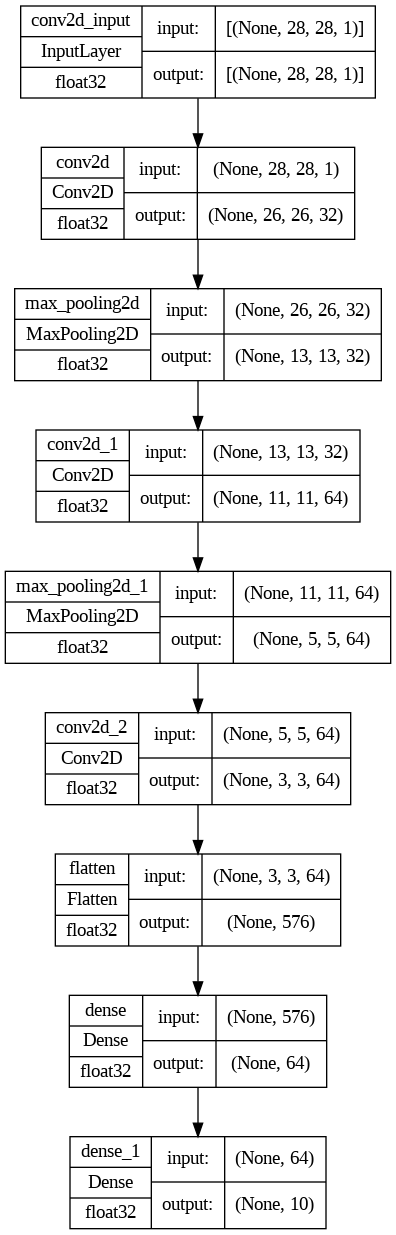

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_layer_names=True, show_shapes=True, show_dtype=True)

### Dissecting a CNN

- The $1^{st}$ conv layer takes the input data in dimensions of `[28, 28, 1]`
  - And via the $ 3 \times 3 $ sliding window, we get values in a $ 26 \times 26 $ grids
  - Since the layer has `32` neurons, we get `32` channels, so the output dimensions are `[26, 26, 32]` - aka. `32` __response maps__
- Each response map corresponds to a __feature__ (so we learned `32` features)
  - some of these features contribute to the classification, some don't
- See below for an example:

![mnist-example1](https://drek4537l1klr.cloudfront.net/chollet/Figures/05fig03.jpg)

__PRO TIP__: you can think of the response map as a blurry version of the original image - the idea is:
  - We won't lose the distinguishable features even if the image is blurry
  - And we lose the low-level features - like take a step back and look at the image again


### How the Convolution Kernel Works?

- The sliding window is usually a 2D tensor of __weights__. Do not confuse yourselves with the __weights__ in a NN.
  - Typically the filter looks like below:
$$ \begin{bmatrix}
1 & 0 & 1\\
0 & 1 & 0\\
1 & 0 & 1\\
\end{bmatrix} $$
- So the convolution kernel works like below:

![conv kernel](https://miro.medium.com/max/900/1*GcI7G-JLAQiEoCON7xFbhg.gif)

#### Parameters in Conv Layers

- Mainly any Conv layers take two parameters:
  - Size of the sliding window: typically $ 3 \times 3 $ or $ 5 \times 5$ - in example above the size is $ 3 \times 3 $, although you might see differnt sizes in some NNs;
  - Depth of the response map: this is determined by the __number of neurons__ in the conv layer, which in turn determines how many features are learned in that particular layer. Typically we set smaller depths in earlier Conv layers and larger depths in later layers (32 and 64 in the example above).

- In `keras`, a `Conv2D` layer is defined as:
```python
Conv2D(depth, (window_height, window_width))
```

### How Convolution Works?

- A convolution works by sliding these windows of size 3 × 3 or 5 × 5 over the 3D input feature map
  - stopping at every possible location,
  - extracting the 3D __response maps__ of surrounding features (shape `(window_height, window_width, input_depth)`)
- The 3D __response maps__ are transformed into 1D tensors
  - via the step called __Max Pooling__, which we will discuss later
- Then the 1D tensors are reassembled into 3D tensors (shape `(height, width, output_depth)`), aka. output feature map
  - The location of the 1D tensors after reassembling corresponds to the location in the input image (e.g., a tensor from the lower left corner remains in the lower left corner in the output feature map
- This process is shown in Figure below.

### Convolution Process

![Conv process](https://drek4537l1klr.cloudfront.net/chollet/Figures/05fig04.jpg)

### Why Padding

- Consider a $ 5 \times 5 $ image (feature map), which contains 25 grids total;
- You can only create 9 response maps when using a $ 3 \times 3 $ sliding window

![without padding](https://drek4537l1klr.cloudfront.net/chollet/Figures/05fig05_alt.jpg)

- In other words, you can calculate the height/width of the output feature map by this equation $ m - (n - 1) $
  - in which $m$ is the height/width of the input feature map, and $n$ is the height/width of the sliding window
  - for example, $ m = 5, n = 3 $, the output height/width is $ 5 - (3 - 1) = 3$.
  - In the MNIST example, $ m = 28, n = 3 $,  the output height/width is $ 28 - (3 - 1) = 26 $.

- This means the output feature map will be slightly smaller than the original feature map ($ 26 < 28 $)
  - After multiple CNN layers, the image will be too small.

### Understanding Padding

- If you want the ouput feature maps in the same shape as the input feature map, you can use __padding__>
- Padding consists of adding an appropriate number of rows and columns on each side of the input feature map
  - so as to make it possible to fit center convolution windows around every input tile.
  - For $ 3 \times 3 $ sliding windows, you can add width of 1 grids to every border of the input feature map, so you can end up with the same shape in the output feature map
  - in `Conv2D` layers, by default there is no padding (`padding = 'valid'`), if you want to use padding just set it to `padding = 'same'`

![padding](https://drek4537l1klr.cloudfront.net/chollet/Figures/05fig06_alt.jpg)

### Understanding Strides

- So far we assume that the sliding window stops at every location possible
- But sometimes we want distance between two successive windows, which is called a __stride__
  - By default stride is set to `1`
- For instance, if you set the stride to `2`, the output feature maps for the $ 5 \times 5 $ input feature map with a $ 3 \times 3 $  without padding looks like below:

![stride=2](https://drek4537l1klr.cloudfront.net/chollet/Figures/05fig07_alt.jpg)

__PRO TIP:__ although strides are not that widely used, you should know this concept since they are used in some networks.

## What is Max Pooling?

- Certainly you have noticed in above network architecture, for every `Conv2D` layer we paired it with a `MaxPooling2D` layer.
- By investigating the shapes of the input and output tensors, you can see that the `MaxPooling2D` layer cuts the input data (shape $ 26 \times 26 $) into half ($ 13 \times 13 $)
- So the purpose of the `MaxPooling2D` layers is to __downsample__
  - it is like a compression, which also explains why the output feature maps are _blurry_
- `MaxPooling2D` layer takes the grids from the sliding windows, then return the __max__ value from each window

![maxpooling2d](https://miro.medium.com/max/713/1*uoWYsCV5vBU8SHFPAPao-w.gif)

- So why do we use Max Pooling along with Convolution?
  - Convolution layers extract different features from the input feature map
  - Max pooling selects the _most important_ (max value) from the feature maps
  - Another reason of using Max Pooling is to suppress noises - which refer to non-contributing or confusing patterns
    - The reason CNNs usually learn better than MLP is because noises in the iamge data are suppressed.
- Max Pooling is more effective, compared to other downsampling techniques, such as _strides_ or _average pooling_

## Training a CNN from Scratch

- Training a CNN from scratch is a good practice of understanding the architecture of CNN, or playing with a toy problem like the MNIST classification.
- However, when you are dealing with real-world CV problems, one of the key challenges is that you always have __too few__ images to train your CNN
  - Even with `10000` images for a binary classification problem, you only have `8000` (80%) for training, since you need `1000` for validation and `1000` for test.
__PRO TIP__: we usually train our own CNN (from scratch) as a __baseline__ model.

### Truth or Myth: Deep Learning needs Big Data?

- You always hear that deep learning models needs a ton of data to train
  - It is valid because deep learning models extract features from the training data without __manual feature engineering__
  - The network can only learn the features if the training data is big enough
  - Particularly if the you are playing with high-dimensional data like images or texts
- But how big is big data?
  - Big is a relative term - whether your data is big enough or not depends on how complex your network is
  - e.g., to solve the same problem, CNN will need less data than a MLP model. Actually we only need a couples thousands of data to train a CNN to get reasonable result.

- The textbook shows a small dogs vs. cats dataset to illustrate this process.
  - We are not going to replicate the process here but dissecting sections that can make the point.

In [ ]:
#### CNN used in Textbook

from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 15, 15, 128)      

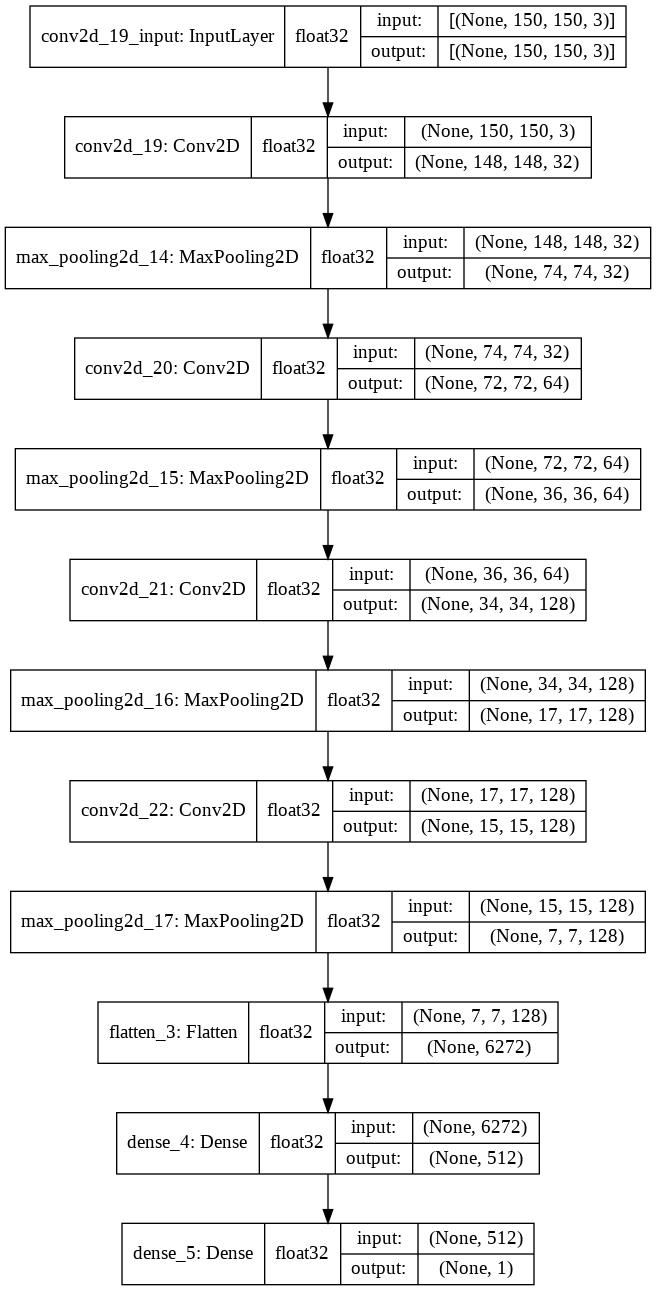

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_layer_names=True, show_shapes=True, show_dtype=True)

#### Dissecting the Model

- We can see that this CNN is much more complex than the toy one we built for the MNIST classification
  - This CNN contains 4 `Conv2D` - `MaxPooling2D` pairs - the reason we use this many layers is because the images are much bigger ($ 150 \times 150 $)
  - We still use the $ 3 \times 3 $ sliding windows and the $ 2 \times 2 $ Max Pooling as we saw before

__PRO TIP__: a rule-of-thumb to select number of `Conv2D` - `MaxPooling2D` pairs: after the last pair, the output height/width should be greater than `5`.


### Preprocessing Image Data

- In real-world CV projects, we would use image files (e.g., `JPEG`s or `PNG`s), but our CNN models can only take 3D tensors (like we saw in the MNIST dataset).
- `keras` provides a preprocessing tool to convert image files into 3D tensors.
- See the code snippets below.

```python
from keras.preprocessing.image import ImageDataGenerator

#### scale the tensor values between 0 and 1
train_datagen = ImageDataGenerator(rescale=1./255)

#### read in the image files, the create mini-batches of 20 images
#### you also have to specify the image size and the classification
#### mode (binary)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150)
        batch_size=20,
        class_mode='binary')
```

### Training our Model

- The output shape from the generator is `(20, 150, 150, 3)`:
  - `20` images/batch
  - `(150, 150)` is the image size
  - `3` is the color channel - the images used here are RGB

- When we use the generator, we need to use `fit_generator()` rather than the regular `fit` method. See example below:

```python
history = model.fit_generator(
      #### instead of train_data and train_labels
      #### we can feed the data packaged in `train_generator`
      train_generator,
      #### this parameter is important when you use generator
      #### otherwise model is trained on the same epoch forever
      steps_per_epoch=100,
      epochs=30,
      #### we can also feed validation data in generator
      validation_data=validation_generator,
      #### similar as above, since we have less validation data
      #### we use a smaller step
      validation_steps=50)
```

### Why Data Augmentation?

- For a relatively small training set, the biggest concern is model __overfitting__
- We already talked about several ways in L4 to fight against overfitting, including:
  - Dropout
  - Early Stopping
  - weight decay
- But specifically in CV, we can use a way called __data augmentation__
  - data augmentation creates more training data based on existing training data
  - it is different from replications (like what we used in oversampling), we create similar but different images
- Data augementation typically improve the performance of CV tasks, particularly image classification

![augemented images](https://drek4537l1klr.cloudfront.net/chollet/Figures/05fig11.jpg)


### How to Data Augement in `keras`

- Below is an example of data augementation in `keras`
```python
datagen = ImageDataGenerator(
      #### to what degree the image should be rotated between 0 - 180
      rotation_range=40,
      #### range of images to be translated vertically or horizontally.
      width_shift_range=0.2,
      height_shift_range=0.2,
      #### range for shearing transformation
      shear_range=0.2,
      #### range for zoom transformation (in or out)
      zoom_range=0.2,
      #### able to flip the image horizontally
      horizontal_flip=True,
      #### fill new pixels with the color of the nearest known pixels
      #### notice the image above in lower left?
      fill_mode='nearest')
```

## Use a Pre-trained CNN

- In deep learning, a common practice is to use a pre-trained model on a specific task
  - This type of learning is called __transfer learning__
  - a __pre-trained model__ is a saved network that was previously trained on a large dataset
  - The large dataset is usually not specific to a tasks (e.g., classifying dogs/cars photos)
  - If the training data is big and generic enough, the pre-trained model serves as a _generic_ model
  - So the pre-trained model can be applied to a new CV problem, even if the problem is totally new to the model
- The most popular pre-trained model in CV is called [__ImageNet__](http://www.image-net.org/) and specifically [**VGG-16**](https://neurohive.io/en/popular-networks/vgg16/).
  - ImageNet is originally developed by Yann LeCun, one of the biggest name in the field, and a [Turing Awardee](https://awards.acm.org/about/2018-turing) - it's like the Nobel in Computer Science.
  - You can refer to the textbook (Section 5.3) for other pre-trained models in CV.
- There are typically two ways of using ___feature extraction___ and ___fine tuning___.

### Feature Extraction with a Pre-trained Model

- Feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples.
  - These features are then run through a new classifier, which is trained from scratch
- As shown before, any CNN for image classification contains two parts:
  - the `Conv - MaxPooling` pairs: used to represent the input (image) data, aka. the __convolutional base__
  - the `Dense` layers: the classifier
- For feature extraction purposes, we only use the convolutional base to extract features from the images
  - then training a new classifier with these extracted features
![feature extraction](https://drek4537l1klr.cloudfront.net/chollet/Figures/05fig14_alt.jpg)

### Why use Convolutional Base?

- The features learned in the convolutional base should be more generic and therefore more reusable
  - These features are useful regardless of any specific CV task
- The features learned in the classifier (`Dense` layers) should be tied to the specific CV task
  - Also the `Dense` layers disregard the location of the learned patterns
  - That would negatively impact the usefulness of the extracted features
- Thus, we always disconnect the classifier from the convolutional base, and only use the latter for feature extraction purpose.
- The generality of the extracted features largely depends on the depth (number of layers) in the network
  - Earlier layers learn local, generic features (such as visual edges, colors, and textures) which are less generalizable
  - latter layers learn more-abstract concepts (such as “cat ear” or “dog eye”)
- If the CV task is very specific, you should used the last few layers only for feature extraction

### How to Load a Pre-trained Model as Convolutional Base?

- We load/instantiate the VGG-16 model as below.

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', #### use the `imagenet` checkpoint/saved model
                  include_top=False, #### disconnect the classifier part
                  input_shape=(150, 150, 3))
conv_base.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

The whole contains `16` layers - hence the name. The final feature map has shape `(4, 4, 512)`.

### How to Extract Features and Use them?

- You need to run the dataset over the convolutional base, then use the output as input for a MLP model (which we are familiar with already)
  - This process is very efficient since CNN is
  - But you cannot use data augementation on this
- You can also connect the MLP classifier with the `conv_base`
  - This method is __slower__ to converge
  - But you can use __data augementation__ with it

#### Fast feature extraction without data augmentation

- we use the first method with a function like below:
```python
def extract_features(directory, sample_count):
    #### holder for extracted features - need to be the same shape of
    #### the outputs from `conv_base`
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    #### Same as the use of generator above
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size, #### 20
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        #### here is where feature extraction happens
        #### we use the `.predict` method from `conv_base`
        #### where the images go through all the layers of `conv_base`
        #### and the output is in shape of (4, 4, 512)
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
```


#### Fast feature extraction without data augmentation

- The rest of the process is straightforward, we just need a MLP model:
```python
#### just a MLP here
model = models.Sequential()
model.add(Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
#### standard compiling
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])
#### we use `train_features` here
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))
```


#### Feature extraction with data augmentation

- We can directly connect the `conv_base` with our own MLP model:
  - with the `Sequential` API, we can add not only the layers, but also models.

In [ ]:
model = Sequential()
#### we add `conv_base` at the top of the network
model.add(conv_base)
#### then just add the MLP after it
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#### the VGG-16 `conv_base` contains 14MM parameters
#### our MLP only contains 2MM parameters
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


#### Feature extraction with data augmentation

- Before compiling the model, we need to __freeze__ the `conv_base`
  - __freezing__ means hold the weights in a layer or multiple layers __constant__ during training
  - If you don't freeze the `conv_base`, the extracted features will be changed during the training of the model
- Since the MLP is randomly initialized, the weights in the model will be updated drastically.
- To freeze the `conv_base` is simple in `keras`. See example below:

In [ ]:
conv_base.trainable = True
print('This is the number of trainable layers '
         'before freezing the conv base:', len(model.trainable_weights))
# This is the number of trainable weights before freezing the conv base: 30
conv_base.trainable = False
print('This is the number of trainable layers '
          'after freezing the conv base:', len(model.trainable_weights))
# This is the number of trainable weights after freezing the conv base: 4

This is the number of trainable layers before freezing the conv base: 30
This is the number of trainable layers after freezing the conv base: 4


You can refer to the full example code of feature extraction with data augementation in the textbook (listing 5.21). You can see with data augementation, the results jumped to `96%` - which is impressive.

__PRO TIP__: You should consider using __feature extraction__ with __data augementation__ if you have limited data but want impressive results.

### Fine-tuning

- Fine-tuning is another application of __transfer learning__, which is complementary to feature extraction
- Fine-tuning usually consists of:
  - __freezing__ earlier layers in the network
  - jointly train newly added layers, with weights updated
- Fine-tuning slightly adjust the extracted features by the pre-trained model
  - so that the features are __more relevant__ to the classification problem at hand

### The Fine-tuning Process

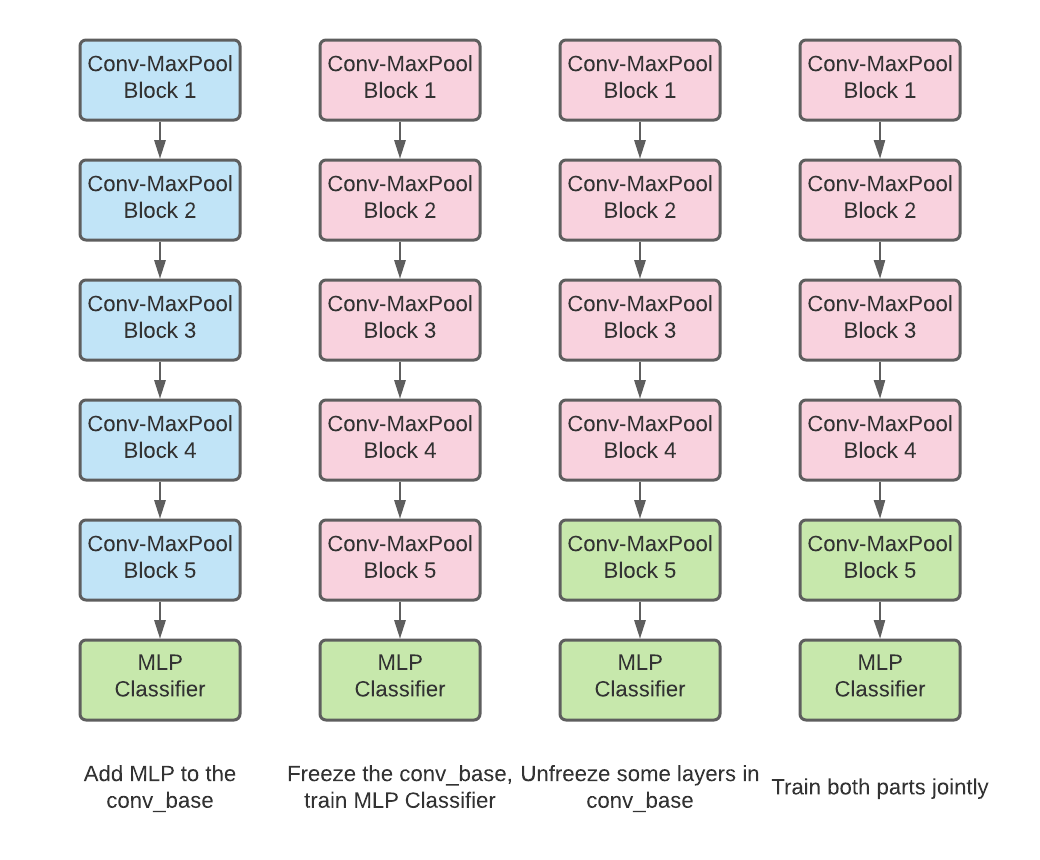

### How to Freeze the layer but one?

- We can still use the `.trainable` state for this:

```python
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
```

## Explainable AI (XAI) - Visualize what CNN Learned

- Any NN models, including CNN, are considered _algorithmic black-boxes_:
  - the learned patterns are in higher-dimensional feature spaces, so that they are harder to extract, present, or explain to humans
  - This will create some kind of barrier for people to trust and adopt deep learning models

- However, compared to other NN models, CNNs are _much easier_ to be explained since we can visualize the learned patterns, including intermediate patterns, in a CNN model
  - This is the way how mainstream XAI methods work (e.g., [LIME](https://paperswithcode.com/method/lime))

- We can visualize different parts in CNN models, for XAI purposes
  - Visualizing intermediate convnet outputs: used to understand how input (image) data is transformed between successive layers
  - Visualizing convnets filters: used to understand what patterns are picked up at a certain layer
  - Visualizing heatmaps of class activation in an image: used to understand how a classification decision is made

### Visualizing intermediate activations

- Intermediate activations refer to the __output feature maps__ from each of the `Conv2D` or `MaxPooling2D` layers in the CNN models
  - Since the output feature maps are output from the activation functions, they are also known as __activations__
- This gives human users ideas what the network learned (in terms of __patterns__)
  - specifically, how input data is decomposed by different filters
- We can visualize the activations along three dimensions:
  - Height/width: defines the size of the activation (_less important_)
  - __channel__: unlike the channel(s) in the input data, which decodes the _color(s)_ in the images, each channel in the activation decodes a _separate_ __feature__
- So we can visualize each feature as a 2D image
  - and use our human knowledge to determine whether the feature makes sense to us

__PRO TIP:__ Normally in XAI, we deal with individual samples (e.g., single images), but we can group them together to learn patterns that are generalizable.

### How to Extract Feature Maps

- In order to do so, we need to load a model in a `model` object
  - Also, you should always save a model when training is complete (with satisfactory performance)
  - Saving a `keras` model means save the architecture (layers, neurons, activations, ...) and learned weights as a __state__. Refer to the [official doc](https://www.tensorflow.org/guide/keras/save_and_serialize) for more help.
- `keras` provides a `Model` class just for that
  - The result is a `keras` model, just like the model we created above using the `Sequential` or the `Functional` API
  - One key difference is that the `Model` object allows __multiple__ outputs

```python
from keras import models
from keras.models import load_model

#### This is how you load a saved model from disk
model = load_model('cats_and_dogs_small_2.h5')
#### you should display the model summary again as a reminder
# model.summary()
#### since we only want activations from the Conv-MaxPooling layers
#### we can use slicing on the model.layers
layer_outputs = [layer.output for layer in model.layers[:8]]
#### below code tells the model using the same input as the original model
#### as for outputs, since we take out the `Dense` layers, we ask the model
#### to only output from the selected layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
#### the activation is using the `activation_model` on a single image
activations = activation_model.predict(img_tensor)
```
- Refer to Listing 5.25 in the textbook about how to convert a single image into an image tensor.

### Activations are Multi-Outputs

- When a single image (tensor) is fed into `activation_model`, the output `activations` contains multiple outputs:
  - `activations` contains output feature maps from __each__ of the selected layers
  - e.g., for above example, `activations` contains `8` outputs since we have `8` selected layers
  - We can use _slicing_ to choose activation from a certain layer (note that activations are 0-indexed)
- For instance, if we want the activation from the first layer:
```python
first_layer_activation = activations[0]
print(first_layer_activation.shape)
## (1, 148, 148, 32)
```


### Plotting a Channel in a Single Layer Activation

- The first layer activation have a size of `(148, 148)` since it went through a `Conv2D` layer with a $ 3 \times 3 $ sliding window
- And it contains `32` different features (channels)
- We can then slice again to plot a certain channel (4) using the code below:
```python
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
```

- The plot looks like below:

![activation_plot](https://drek4537l1klr.cloudfront.net/chollet/Figures/05fig25.jpg)

- We can see this is a good feature since it captures important high-level features like ears, eyes and nose
  - Just so you know this channel used a diagonal edge detector

### Plot a Different Channel
- We can try a different channel (7), which looks like below:

![activation_plot1](https://drek4537l1klr.cloudfront.net/chollet/Figures/05fig26.jpg)

- Looks like the channel picked up the eyeballs of the cat
  - Which might not be so important since cats and dogs both have eyeballs
- Note that if you try this on your own model, your activation/channel maybe different because of the stochastic nature of the models - nothing is deterministic.


### What can We Read from Activations

- You can refer to Figure 5.27 in the textbook for all the channels/activations
- The first layer, or the first Conv-MaxPooling pair, uses various edge detectors
  - This layer attempts to capture all the information from the input image
- As going to the later layers, the activations become more abstraction, hence less visually interpretable
  - these high-level fatures include cat ears or dog eyes
  - which ties less to the input images but more to the classes in the classification
  - More and more activations in the later layers are blank - which means the corresponding filter cannot recognize a pattern in the input image
- In that way, we can treat CNN as a __information distillation pipeline__ (or you can image it as a fennel), where only features related to the classification problem are preserved in the NN
  - This also proves that NN works like our brain - when we try to recall something from memorization, we often remember the overall shape, or important characteristics, but largely overlooking the details in it
    - Because our brain filter out low level details, only keeping high level _features_ in the memory

### Visualizing CNN Filters

- Similarly, we can also understand what a layer learned by looking at what do the filters in it respond to
- In this case, we focus on a specific filter in a given layer rather than an individual image
- Then you use SGD to adjust the values in the input image tensor to maximize the activation value.
- You can select a specific filter using code similar to below:

```python
from keras.applications import VGG16
#### you use below when you want to do certain tensor operations in `keras`
from keras import backend as K

model = VGG16(weights='imagenet',
              include_top=False)
#### define layer and filter you want to select
layer_name = 'block3_conv1'
filter_index = 0
#### get the output then calculate the loss
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])
```

### Visualizing CNN Filters

- To perform SGD, you need the gradient of the loss, against the `input` of the `model`. `keras` provides a `gradients` functions for that:
```python
grads = K.gradients(loss, model.input)[0]
```
- One trick we do to the gradients is to normalize it using L2-regularization ($L2_{norm}$)
  - for instance, for a tensor ($V$) with $N$ values ($v_i, i \in {1,2,3, ..., N}$):

$$ L2_{norm}^V = \sqrt{\frac{1}{N}{\sum_{i=1}^N{v_i^2}}}$$
  - We can do this like below in `keras`
```python
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
```
- Remember above codes give us `loss` and `grads` for __one__ pixel in the input image, so we need to iterate over all pixels.
  - Of course we can use the old for-loop, but `keras` prvoides a more efficient way:
```python
iterate = K.function([model.input], [loss, grads])
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])
```
  - Then we can just use for-loop to go through the iteration (see Listing 5.36 in textbook)
- Please read Figure 5.30 - 5.33, you can see that:
  - filters in earlier layers responds to low level features like edges or colors, or simple textures
  - filters in later layers responds to high level features

__PRO TIP__: visualizing output feature maps and filters are different, but their purposes are similar. In practice we only need to use one (usually the __output feature maps__).


### Visualizing heatmaps of class activation

- The purpose is used to determine _which part of the image leads to a specific classification decision_
  - Such as "Image X contains a cat because the upper-left corner is a cat ear"
- This is very important for diagosing purposes
  - We use it on mis-classified images to understand which part(s) of the images confused the model
- This type of techniques is called **class activation map** (CAM) visualization
  - usually use _heatmaps_
  - A CAM heatmap is a 2D grid of scores associated with a specific output class
    - the 2D grid corresponds to every location in any input image
    - indicating how important each location is with respect to the class under consideration

### CAM Process

- The CAM process is designed in [this study](https://arxiv.org/abs/1610.02391) and it is fairly straightforward
- First we get all the output feature maps from any convolution layer like we did [here](#scrollTo=G_OMhSKFLB0q&line=13&uniqifier=1)
- Then we weigh every channel in the output feature map
  - the weights are the gradient of the class in that channel
  - In other words, we are looking at _how intensively different parts of the image activates different channels_
  - and it is determined by how important each channel is to the class (aka. **feature importance**)
  - Combining the two will give us "how intensely different parts of the input image activates the class."

### CAM Process Implemented

- Let's use a different CV task as an example: __Object Dectection__
  - It is different from the __image classification__ task we are familiar with
  - Instead of determining whether an image belong to a predefined class, OD asks what object(s) appear in the image
  - Usually it's harder than the IC tasks
- Use the following image as an example:
  - We try to determine are there _elephant(s)_ in that image
  - so we need to determine the objects: their __boundaries__ and __kind__

![elephants](https://drek4537l1klr.cloudfront.net/chollet/Figures/05fig34.jpg)

### CAM Process Implemented

- Since we had some success with the `VGG16` model, we are going to use it again here
- Similar to the image classification task, we need to preprocess the image:
  - read the image
  - re-size it to `(224, 224)`
  - convert it to a `NumPy` `float32` array (tensor)
- We can use `keras.applications.vgg16.preprocess_input` for that. See code snippets below:
```python
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
img_path = '/Users/fchollet/Downloads/creative_commons_elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
```
- Then we can simply using the model to predict, and the results are:
  - African elephant (with 92.5% probability)
  - Tusker (with 7% probability)
  - Indian elephant (with 0.4% probability)


### Generating the CAM Heatmap

- We can then check which value in the predicted vector (output of the `VGG16` model) yields the max probability:
```python
np.argmax(preds[0])
# 386
```
- Next we need to backtrack which part in the original image corresponds to the predicted value #386:
```python
african_e66lephant_output = model.output[:, 386]
#### trace back to the last Conv layer
#### note that the last or the penultimate layer are usually used
last_conv_layer = model.get_layer('block5_conv3')
#### get the gradients for that layer
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
#### we have three color channels so we pool the gradients across them
pooled_grads = K.mean(grads, axis=(0, 1, 2))
#### going through all the pixels in the image
iterate = K.function([model.input],
                     [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
#### generating the heatmap
heatmap = np.mean(conv_layer_output_value, axis=-1)
```

### How to Use the Heatmap

- And the heatmap looks like below:

![heatmap-CAM](https://drek4537l1klr.cloudfront.net/chollet/Figures/05fig35.jpg)

- Then with the help of a great package `OpenCV`, we overlay the heatmap on the original image:
  - `OpenCV` is widely used in various computer vision tasks, see [here](https://docs.opencv.org/master/d9/df8/tutorial_root.html) for their official tutorials
  - [This](https://stackoverflow.com/questions/56275515/visualizing-a-heatmap-matrix-on-to-an-image-in-opencv) answer contains great code snippets to visualize heatmap matrix on an image

![hotzone](https://drek4537l1klr.cloudfront.net/chollet/Figures/05fig36.jpg)

### So what did we learn?

- From the overlaid heatmap, we can learn:
  - the `VGG16` model determined that this image is `african elephant` mainly because of the __head part__ of the calf elephant, but also the __head part__ of the adult elephant
    - This makes sense to us: the most distinguishable features of the elephant are the __trunk__ (nose), **ears** and __tusks__ (teeth), which are all around the head area
    - and this is probably how the model differentiate between `african elephant` and `indian elephant`
  - The elephant located in the __central__ part of the image

- On the contrary, if the model made a wrong prediction, we can use similar information decode what information in the image misled the model

# Deep Learning & Artificial Intelligence
## Deep Learning for Computer Vision - Chapter 5
### Dr. Jie Tao, Fairfield University